In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
X = pd.read_csv('/content/X.csv')

In [ ]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
len(X_train)/len(X)

0.75

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.0497686898266849e+18, tolerance: 8778528640411840.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
model.score(X_test, y_test)

0.8797724712733348

In [ ]:
model.coef_

array([ 1.14541944e+00,  7.89393386e+05, -4.50826090e+06, -2.51713135e+04,
       -1.81701705e+02, -7.97172235e-04,  8.69197195e+06,  1.93070042e+00])

In [ ]:
var = np.floor(np.log10(np.abs(model.coef_)))

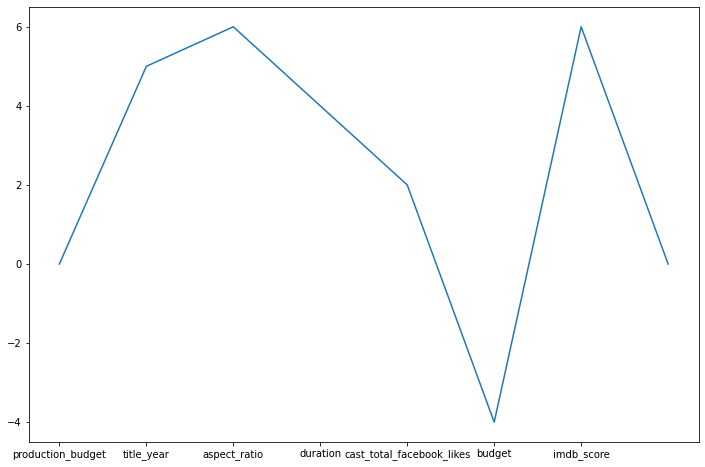

In [ ]:
plt.rcParams['figure.figsize'] = [12,8] 
plt.plot(var)
plt.xticks(np.arange(7),list(X.columns));

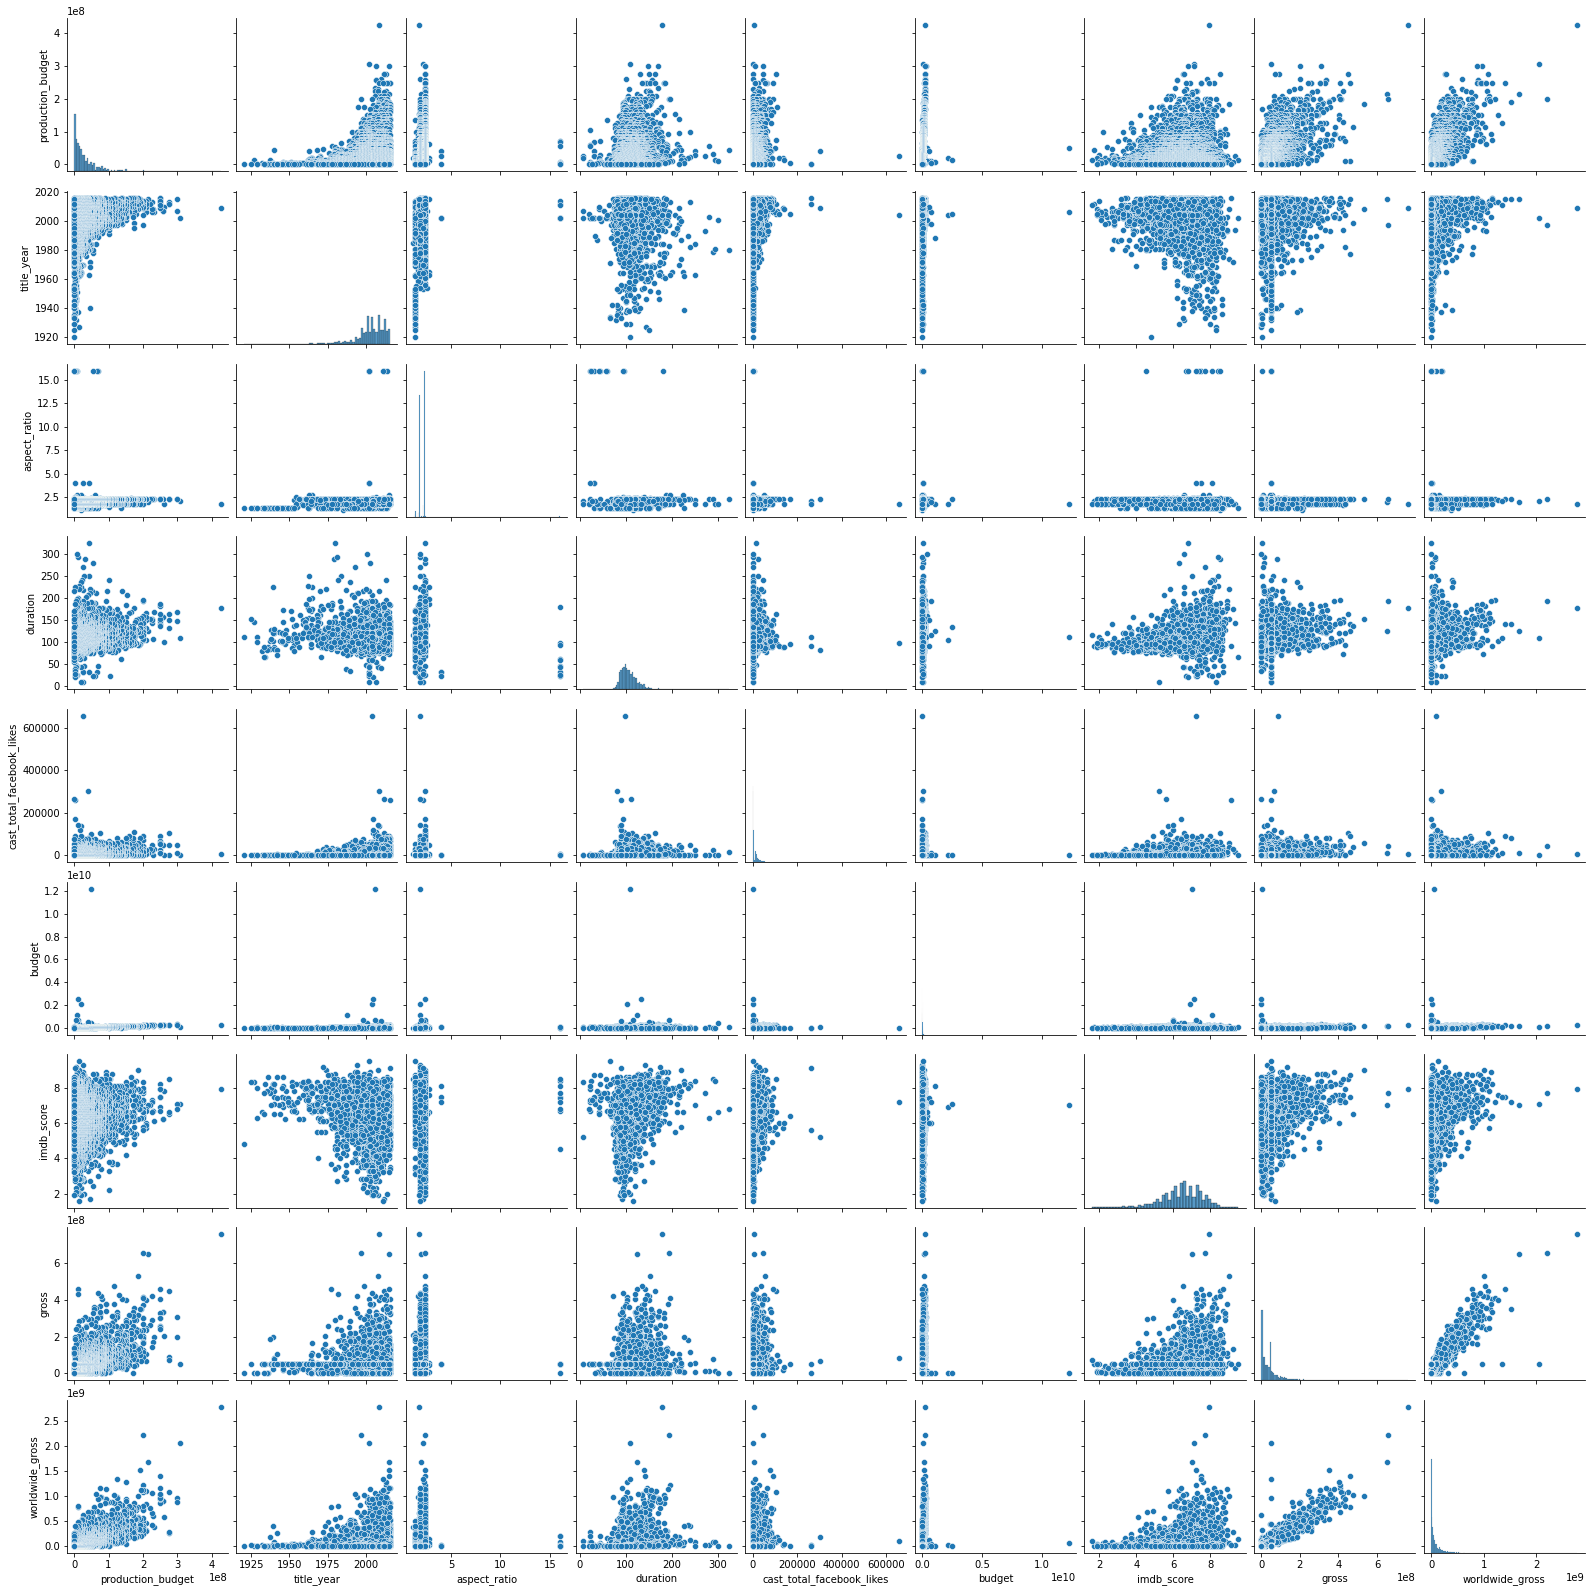

In [ ]:
import seaborn as sns

Z = pd.concat([X,y],axis=1)
sns.pairplot(Z)

In [ ]:
clase = pd.cut(X['production_budget'],8).cat.codes.rename('clase')
z2 = pd.concat([X,clase],axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

KeyboardInterrupt: ignored

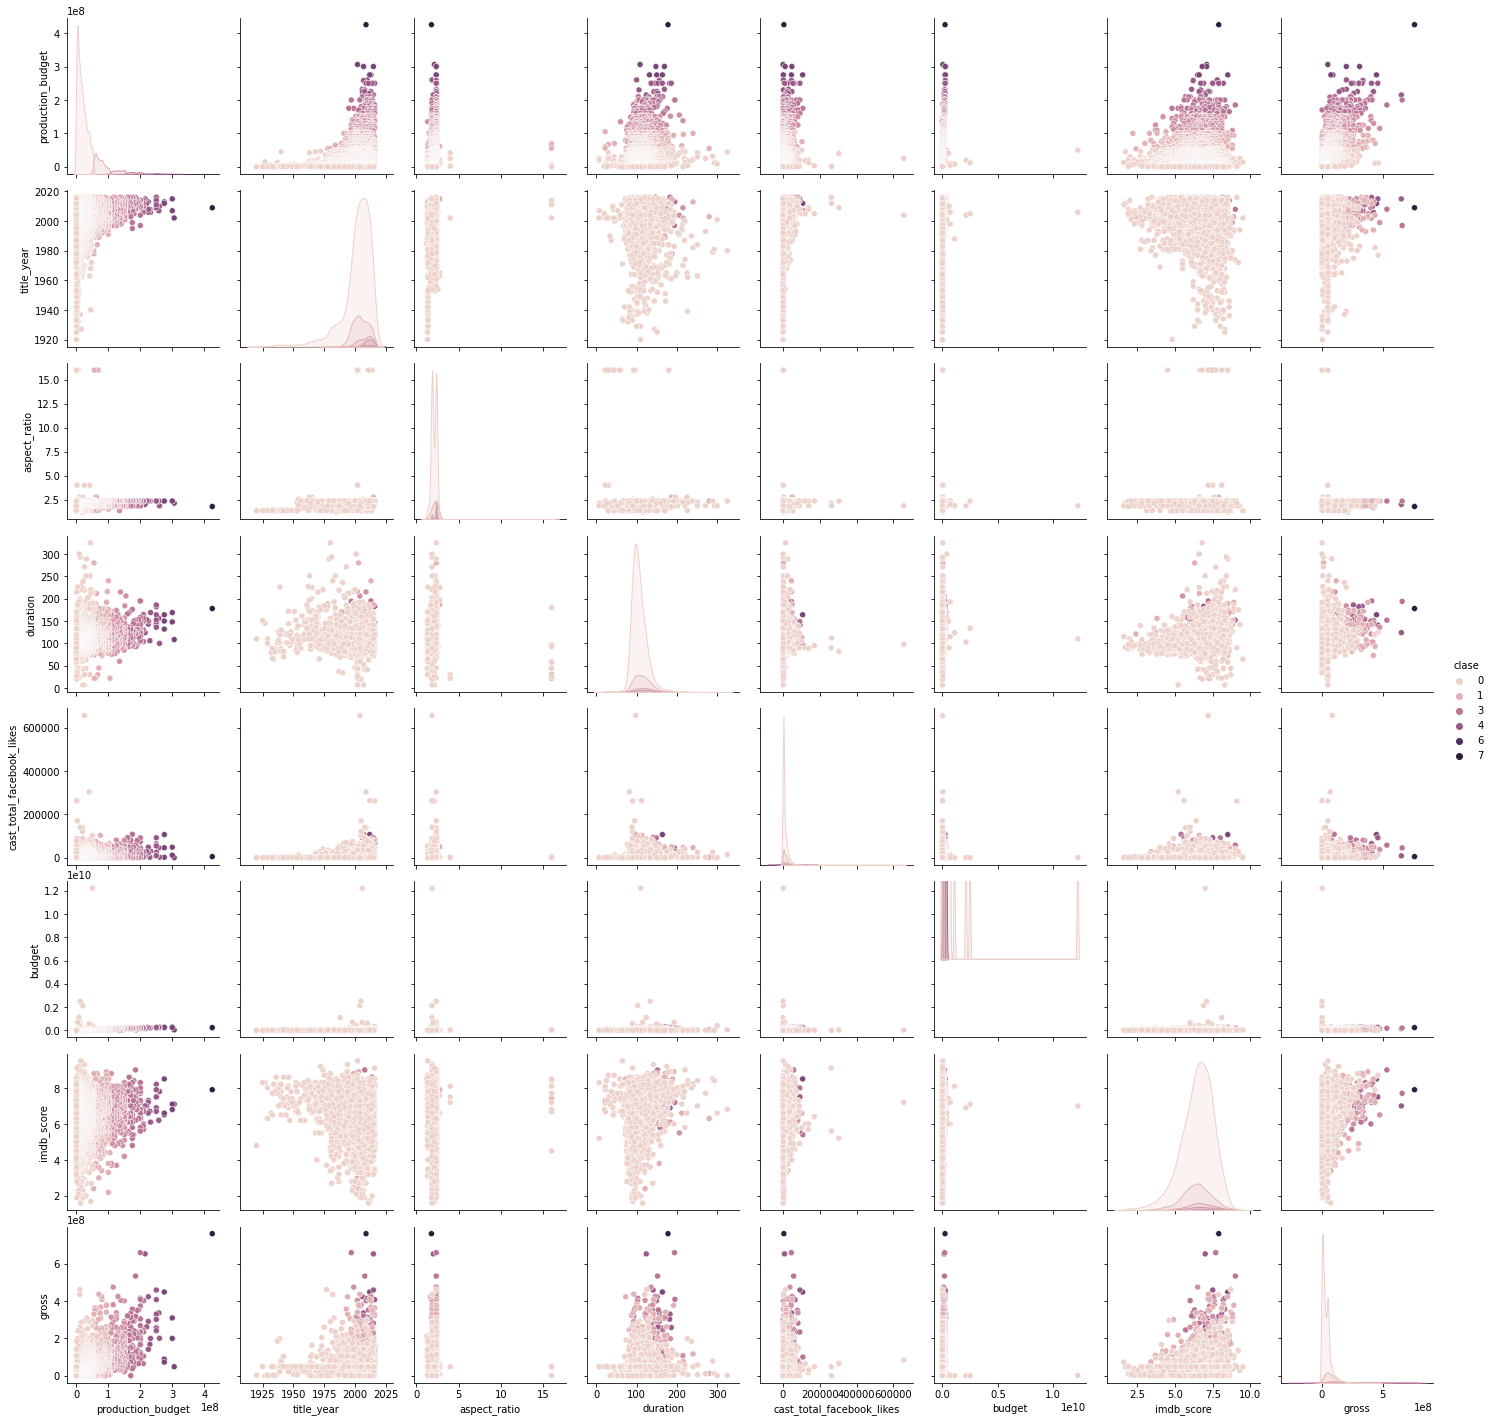

In [ ]:
sns.pairplot(z2,hue='clase')

In [ ]:
Z3 = pd.concat([X, y], axis=1)
sns.heatmap(Z3.corr())

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

In [ ]:
scores = selector.scores_
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7),list(X.columns));

In [ ]:
X2 = X[['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']]
X3 = X[['production_budget','cast_total_facebook_likes','imdb_score']]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2],X_test[cols2], y_train, y_test
cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3],X_test[cols3], y_train, y_test

In [ ]:
from sklearn.linear_model import Lasso

model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

In [ ]:
print(model1.score(X_test, y_test))
print(model2.score(X2_test, y2_test))
print(model3.score(X3_test, y3_test))

## escalamiento de los datos

las regresiones no la necesitan mientras que las clasificaciones si


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

In [ ]:
scaler.mean_

In [ ]:
scaler.scale_

In [ ]:
scaler.transform(X_train)

array([[-0.15953295, -1.60140223, -0.36402387, ..., -0.06467775,
         1.35739331, -0.42011496],
       [-0.52037602,  0.48581409, -0.36402387, ..., -0.12929399,
        -0.41597537, -0.26427928],
       [ 0.03291668,  0.73628005, -0.36402387, ..., -0.03021575,
        -0.50931056, -0.15213461],
       ...,
       [ 0.51404077,  0.6527914 ,  0.29362813, ...,  0.05593924,
        -0.13596979,  0.76046928],
       [-0.4482074 ,  0.6527914 ,  0.29362813, ..., -0.11637074,
        -0.13596979, -0.43970302],
       [ 1.11544587, -0.51604974,  0.29362813, ...,  0.12055548,
        -0.13596979, -0.17158351]])

In [ ]:
X_train_scaled, X_test_scaled = (scaler.transform(X_train), scaler.transform(X_test))

In [ ]:
model = Lasso()
model1_scaled = Lasso()

model1.fit(X_train,y_train)
model1_scaled.fit(X_train_scaled,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(model1.score(X_test, y_test))
print(model1_scaled.score(X_test_scaled, y_test))

0.8844636520001707
0.8844636522249283


# Simplificar las transformaciones con pipelines

In [ ]:
from sklearn.pipeline import make_pipeline

model_scaled = make_pipeline(StandardScaler(),
                             Lasso())

model_scaled.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [ ]:
print(model_scaled.score(X_test, y_test))

0.8844636522249283


# Crear nuevas features de forma automatica

In [ ]:
A = np.arange(6).reshape(3, 2)
A

array([[0, 1],
       [2, 3],
       [4, 5]])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

transformer = PolynomialFeatures(2)
transformer.fit(A)
transformer.transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

PolinomyalFeatures transforma una matriz(A1,A2) a (1,A1,A2,A1²,A1.A2,A2²)

In [ ]:
transformer.fit_transform(A)

array([[ 1.,  0.,  1.,  0.,  0.,  1.],
       [ 1.,  2.,  3.,  4.,  6.,  9.],
       [ 1.,  4.,  5., 16., 20., 25.]])

In [ ]:
X.shape

(4104, 8)

In [ ]:
transformer = PolynomialFeatures(2)
transformer.fit_transform(X).shape

(4104, 45)

Genera todos los polonomios posibles de una Feature. por ende mientras mas features mas combinaciones posibles. puede generar una dimension muy grande

In [ ]:
model_poly = make_pipeline(PolynomialFeatures(2),
                           Lasso())
model_poly.fit(X_train, y_train)
model_poly.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.344736089366877e+18, tolerance: 9673861627892484.0
  positive)


0.9059238460600285

## Features Categoricas

encoding one-hot

In [ ]:
d = pd.DataFrame([['Argentina', 'Colombia','Venezuela','Peru'],['hombre','mujer','hombre','mujer']])
d = d.T
d.columns = pd.Index(['pais', 'genero'])
d

,pais,genero
0,Argentina,hombre
1,Colombia,mujer
2,Venezuela,hombre
3,Peru,mujer


In [ ]:
pd.get_dummies(d)

,pais_Argentina,pais_Colombia,pais_Peru,pais_Venezuela,genero_hombre,genero_mujer
0,1,0,0,0,1,0
1,0,1,0,0,0,1
2,0,0,0,1,1,0
3,0,0,1,0,0,1


In [ ]:
movies_obj = pd.read_csv('/content/peliculas.csv')

In [ ]:
categoricals = pd.read_csv('/content/categoricals.csv')

In [ ]:
categoricals.head(2)

,Unnamed: 0,actor_1_name,director_name
0,0,CCH Pounder,James Cameron
1,1,Doug Walker,Doug Walker


In [ ]:
movies_obj.apply(pd.Series.nunique).sort_values()

color                           2
content_rating                 18
aspect_ratio                   22
language                       47
country                        65
imdb_score                     78
title_year                     91
duration                      191
duration.1                    191
budget                        439
genres                        914
actor_1_name                 2097
director_name                2398
actor_2_name                 3032
actor_3_name                 3521
cast_total_facebook_likes    3978
gross                        4035
plot_keywords                4760
movie_title                  4917
dtype: int64

In [ ]:
!pip install category_encoders

In [ ]:
categoricals.head(2)

,Unnamed: 0,actor_1_name,director_name
0,0,CCH Pounder,James Cameron
1,1,Doug Walker,Doug Walker


In [ ]:
categoricals = categoricals.reset_index(drop=True).fillna(0)

In [ ]:
X_binenc = pd.concat([X,categoricals], axis = 1)

In [ ]:
X_binenc.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,gross,Unnamed: 0,actor_1_name,director_name
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7.605058e+08,0,CCH Pounder,James Cameron
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,4.831933e+07,1,Doug Walker,Doug Walker
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,3.094042e+08,2,Johnny Depp,Gore Verbinski
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,2.000742e+08,3,Christoph Waltz,Sam Mendes
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,4.481306e+08,4,Tom Hardy,Christopher Nolan


In [ ]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['actor_1_name','director_name'])

In [ ]:
X_binenc = encoder.fit_transform(X_binenc)

/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [ ]:
Xb_train, Xb_test, y_train, y_test = train_test_split(X_binenc,y)

In [ ]:
X_train, X_test = (Xb_train[X.columns], Xb_test[X.columns])

In [ ]:
model = Lasso()
model_binenc = Lasso()

In [ ]:
model_binenc.fit(Xb_train, y_train)
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.4443647808979896e+18, tolerance: 8358335922165649.0
  positive)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
print(model_binenc.score(Xb_test,y_test))
print(model.score(X_test, y_test))

0.8616198736564016
0.8536304973278551


# Conocimiento experto

lo que vale es el contorno 